In [1]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import os
# from mothur_py import Mothur
from shutil import copy
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")

In [2]:
fastq_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Concatenated/20171103_FAH15473/barcode02/merged.fastq", "fastq"))

The number of reads in this file is 413127


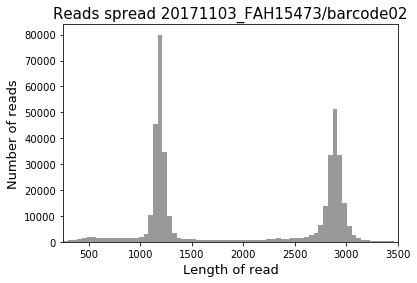

In [3]:
lengths = []
for key in fastq_dict:
    lengths.append(len(fastq_dict[key].seq))
print("The number of reads in this file is", len(fastq_dict))
ax = sns.distplot(lengths, color="k", kde=False, bins=5000)


ax.set(xlim=(250, 3500))
ax.set_title("Reads spread 20171103_FAH15473/barcode02", fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)

plt.show()

In [4]:
frDNA = fastq_dict.copy()
for key in fastq_dict:
    if len(fastq_dict[key].seq) not in range(2700, 3200):
        del frDNA[key]
print("The number of reads between 2700 and 3200 bp in length is", len(frDNA))
EF1a = fastq_dict.copy()
for key in fastq_dict:
    if len(fastq_dict[key].seq) not in range(900, 1400):
        del EF1a[key]
print("The number of reads between 900 and 1400 bp in length is", len(EF1a))

The number of reads between 2700 and 3200 bp in length is 167054
The number of reads between 900 and 1400 bp in length is 192712


In [5]:
# Write the reads defined between the frDNA cutoff into a new fasta file
SeqIO.write(frDNA.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_frDNA_clipped.fastq", "fastq")

167054

In [6]:
# Write the reads defined between the EF1a cutoff into a new fasta file
SeqIO.write(EF1a.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_EF1a_clipped.fastq", "fastq")

192712

In [7]:
frDNA_extract={k: frDNA[k] for k in list(frDNA.keys())[:500]}
EF1a_extract={k: EF1a[k] for k in list(EF1a.keys())[:500]}

In [8]:
for key in frDNA_extract:
    frDNA_extract[key].annotations = 'frDNA'
for key in EF1a_extract:
    EF1a_extract[key].annotations = 'EF1a'

In [9]:
combined_extract = {}
combined_extract.update(frDNA_extract)
combined_extract.update(EF1a_extract)
print(len(frDNA_extract))
print(len(EF1a_extract))
print(len(combined_extract))

500
500
1000


In [10]:
SeqIO.write(frDNA_extract.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_frDNA_extract_test.fastq", "fastq")
SeqIO.write(EF1a_extract.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_EF1a_extract_test.fastq", "fastq")
SeqIO.write(combined_extract.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_combined_extract_test.fastq", "fastq")

1000

In [11]:
frDNA_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/frDNA_clipped_test.paf", sep='\t', header=None, engine='python')
EF1a_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/EF1a_clipped_test.paf", sep='\t', header=None, engine='python')
combined_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/combined_test.paf", sep='\t', header=None, engine='python')

In [12]:
frDNA_paf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,11765199-a559-412c-9c2d-992dead3d782,2912,1945,2574,+,Kluyveromyces|KT853036,1778,1110,1752,72,646,47,tp:A:P,cm:i:7,s1:i:68,s2:i:0,dv:f:0.1860
1,e72814ef-ec58-42da-8d8f-59c40d51d6bf,2951,1449,1784,+,Zymoseptoria|KM246156,484,118,444,76,335,60,tp:A:P,cm:i:8,s1:i:75,s2:i:0,dv:f:0.1354
2,2f569c0e-ef7d-48a1-a215-5a35e14ae35b,2906,1141,1458,-,Zymoseptoria|KM246156,484,134,451,81,328,17,tp:A:P,cm:i:7,s1:i:77,s2:i:66,dv:f:0.1421
3,2f569c0e-ef7d-48a1-a215-5a35e14ae35b,2906,322,1815,-,Kluyveromyces|KT853036,1778,100,1752,105,1654,60,tp:A:P,cm:i:9,s1:i:76,s2:i:0,dv:f:0.2270
4,2f569c0e-ef7d-48a1-a215-5a35e14ae35b,2906,1351,1458,-,Oculimacula(Tapesia)|AY713294,608,260,368,66,109,0,tp:A:S,cm:i:6,s1:i:66,dv:f:0.0835,None


In [13]:
combined_paf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,11765199-a559-412c-9c2d-992dead3d782,2912,1945,2574,+,Kluyveromyces|KT853036,1778,1110,1752,72,646,47,tp:A:P,cm:i:7,s1:i:68,s2:i:0,dv:f:0.1860
1,e72814ef-ec58-42da-8d8f-59c40d51d6bf,2951,1449,1784,+,Zymoseptoria|KM246156,484,118,444,76,335,60,tp:A:P,cm:i:8,s1:i:75,s2:i:0,dv:f:0.1354
2,2f569c0e-ef7d-48a1-a215-5a35e14ae35b,2906,1141,1458,-,Zymoseptoria|KM246156,484,134,451,81,328,17,tp:A:P,cm:i:7,s1:i:77,s2:i:66,dv:f:0.1421
3,2f569c0e-ef7d-48a1-a215-5a35e14ae35b,2906,322,1815,-,Kluyveromyces|KT853036,1778,100,1752,105,1654,60,tp:A:P,cm:i:9,s1:i:76,s2:i:0,dv:f:0.2270
4,2f569c0e-ef7d-48a1-a215-5a35e14ae35b,2906,1351,1458,-,Oculimacula(Tapesia)|AY713294,608,260,368,66,109,0,tp:A:S,cm:i:6,s1:i:66,dv:f:0.0835,None


In [14]:
print("min len of match for frDNA is", frDNA_paf[1].min())
print("min len of match for EF1a is", EF1a_paf[1].min())
print("min len of match for combined is", combined_paf[1].min())

min len of match for frDNA is 2700
min len of match for EF1a is 900
min len of match for combined is 284


In [15]:
print('num matches with unique ids for frDNA is', len(frDNA_paf[0].unique()))
print('num matches with unique ids for EF1a is', len(EF1a_paf[0].unique()))
print('num matches with unique ids for combined is', len(combined_paf[0].unique()))

num matches with unique ids for frDNA is 123026
num matches with unique ids for EF1a is 2124
num matches with unique ids for combined is 143363


Compare above (using minimap2) with BLAST approach
    - BLAST may be too slow on a larger dataset


Check with other alignment programs eg. lastz, BLAT (check for others)



# Testing of full size-clipped files for alignment via minimap2
 - For each of the frDNA_clipped and EF1a_clipped files as created above 
     - Look for the number of unique ids in the resultant file
     - Determine the percentage of reads in this range that match homology given total number of reads in the clipped.fastq file

In [16]:
frDNA_clipped_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/frDNA_clipped_test.paf", sep='\t', header=None, engine='python')

In [17]:
EF1a_clipped_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/EF1a_clipped_test.paf", sep='\t', header=None)

In [18]:
print('Total number of matches found for frDNA is', len(frDNA_clipped_paf[0].unique()))
print('Percentage of matches in region =', "{:.3%}".format((len(frDNA_clipped_paf[0].unique())/167054)))

Total number of matches found for frDNA is 123026
Percentage of matches in region = 73.644%


In [19]:
print('Total number of matches found for EF1a is', len(EF1a_clipped_paf[0].unique()))
print('False positive percentage =', "{:.3%}".format((len(EF1a_clipped_paf[0].unique())/192712)))

Total number of matches found for EF1a is 2124
False positive percentage = 1.102%


In [20]:
print('Total number of matches found for the total of reads is', len(combined_paf[0].unique()))
print('Percentage of matches overall =', "{:.3%}".format((len(combined_paf[0].unique())/413127)))

Total number of matches found for the total of reads is 143363
Percentage of matches overall = 34.702%


~~Plot distribution of matching reads as above~~

~~Repeat minimap2 for above to see if fluctuations~~

Explore non-mapping 25%

Scaling - plots saved out, file for statistics (loop over later)

In [21]:
# combined_ids = []
# for key in combined_paf[0].unique():
#     combined_ids.append(key)
combined_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Concatenated/20171103_FAH15473/barcode02/merged.fastq", "fastq"))
comb_dict = {}
for key in combined_paf[0].unique():
    comb_dict[key] = combined_dict[key]

In [ ]:
lengths = []
for key in comb_dict:
    lengths.append(len(comb_dict[key].seq))

stats_dict = {'number of frDNA reads':len(lengths),'minimum read length':min(lengths),'maximum read length':max(lengths),'mean read length':"{:.0f}".format(np.mean(lengths)),'median read length':"{:.0f}".format(np.median(lengths))}
stats = pd.DataFrame(stats_dict, index=['20171103_FAH15473/barcode02'])
        
              
ax = sns.distplot(lengths, color="k", kde=False, bins=5000)
ax.set(xlim=(250, 3500))
ax.set_title("frDNA reads for 20171103_FAH15473/barcode02", fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)
plt.show()


ax = sns.distplot(lengths, color="k", kde=False, bins=5000)
ax.set(xlim=(2400, 3500))
ax.set_title("frDNA reads for 20171103_FAH15473/barcode02", fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)
plt.show()


display(stats)

In [23]:
fr_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_frDNA_clipped.fastq", 'fastq'))
print(len(fr_dict))

167054


In [ ]:
non_dict = {}
for key in fr_dict:
    if key not in frDNA_clipped_paf[0].unique():
        non_dict[key] = fr_dict[key]
print(len(non_dict))

In [ ]:
lengths = []
for key in non_dict:
    lengths.append(len(non_dict[key].seq))

non_dict_stats = {'number of reads':len(lengths),'minimum read length':min(lengths),'maximum read length':max(lengths),'mean read length':"{:.0f}".format(np.mean(lengths)),'median read length':"{:.0f}".format(np.median(lengths))}
stats = pd.DataFrame(non_dict_stats, index=['20171103_FAH15473/barcode02'])
        
              
ax = sns.distplot(lengths, color="k", kde=False, bins=5000)
ax.set(xlim=(250, 3500))
ax.set_title("non-frDNA reads for 20171103_FAH15473/barcode02", fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)
plt.show()
display(stats)